## MT09 - TP7 - Automne 2025
### Schémas numériques pour les équations différentielles


### 1. Croissance cellulaire

Dans les exercices de travaux dirigés, on a vu le modèle différentiel continu de croissance cellulaire
$$
\frac{d\rho(t)}{dt} = \sigma \frac{\rho(t)}{\rho_M}(\rho_M-\rho(t)),\quad t\in [0,T]
$$

où $\rho$ représente la densité de cellules par unité de surface. À cette équation différentielle, on associe la condition initiale $\rho(0) = \rho_0$, $0<\rho_0 \ll \rho_M$. On rappelle que la solution exacte s'écrit

$$
\rho(t) = \rho_M \, \frac{e^{\sigma t}}{\dfrac{\rho_M}{\rho_0}-1+e^{\sigma t}}.
$$


Le module ```scipy.integrate``` donne accès à la méthode ```odeint()``` qui résout numériquement un problème différentiel pour la fonction
$\mathbf{f}(t,\mathbf{y})$ implémentée dans la méthode `model(t,y)`:

```
y = odeint(model, y0, t, tfirst=True)
```

(voir l'aide de ```odeint()```, l'option `tfirst=True` précise que la première variable de $\mathbf{f}$ est $t$). 

Ecrire une fonction
```croissanceCell(t,rho)``` qui implémente la fonction de l'équation différentielle de croissance cellulaire :

$$
f(t,\rho) = \sigma \frac{\rho}{\rho_M}(\rho_M-\rho).
$$

Résoudre ensuite numériquement le problème différentiel et comparer à la solution exacte $\rho(t)$.

Pour l'application numérique, on utilisera les paramètres
$T=20$, $\rho_M=1000$, $\rho_0=5$ et $\sigma=0.7$ et ```t = np.linspace(0,T, 100)```.

In [42]:
import numpy as np
from mpmath import linspace


def rho(t):
    # ...
    rhom=1000
    rho0=5
    sigma=0.7

    rho=rhom*np.exp(sigma*t)/(rhom/rho0-1+np.exp(sigma*t))

    return rho

def croissanceCell(t,rho):

    rhom=1000
    sigma=0.7
    y=sigma*rho/rhom*(rhom-rho)
    return y

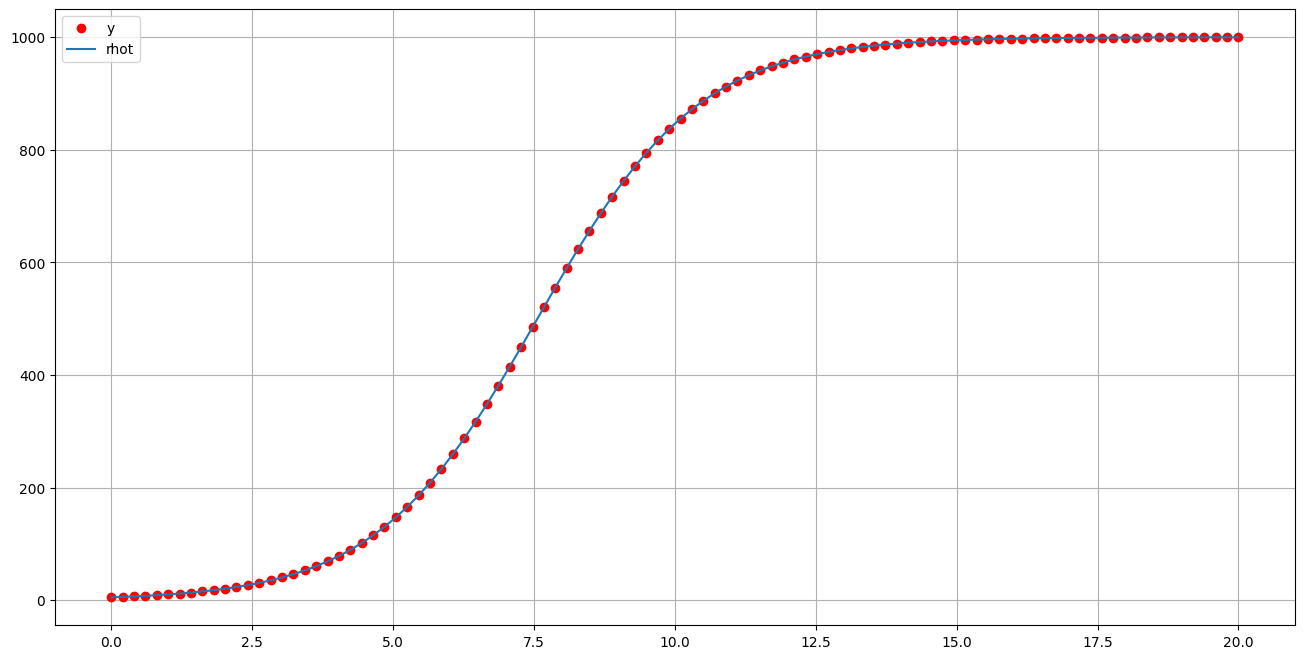

In [43]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
rhom=1000
rho0=5
sigma=0.7
T=20
t=np.linspace(0,T,100)

y=odeint(croissanceCell,rho0,t,tfirst=True)

plt.figure(figsize=(16, 8))
plt.grid()
plt.plot(t, y, 'ro', label="y")
plt.plot(t, rho(t), '-', label="rhot")
plt.legend()
plt.show()



#### Schéma d'Euler explicite

Ecrire une fonction python ```Euler(F, y0, t0, T, N)``` qui met en oeuvre le schéma d'Euler explicite 

$$
z_{n+1} = z_n + h\, F(t_n, z_n), \quad t_n = t_0 + hn,
$$

pour une fonction $F$ (à valeurs scalaires ou vectorielles), une donnée initiale $y_0$, un temps initial $t_0$, un temps final $T$, sur une subdivision uniforme constituée de $N$ sous-intervalles, avec un pas
$h=\frac{T-t_0}{N}$. 

Les tableaux de sorties seront le tableau des temps discrets $t$ et le tableau (ou matrice) $z$ des états du système $y_n$ aux temps discrets $t_n$ : on devrait pouvoir écrire

```
t, z = Euler(<maFonction>, y0, t0, T, N)
```

In [44]:
y0=5
T=20
n=50
t0=0

def Euler(croissanceCell,y0,t0,T,n):

    h=(T-t0)/n
    t=np.linspace(t0,T,n+1)
    z=np.zeros(n+1)
    z[0]=y0

    for i in range(n):
        z[i+1]=z[i]+h*croissanceCell(t[i],z[i])

    return t,z

Appliquez la méthode d'Euler au problème de croissance cellulaire. On prendra toujours $y_0=5$, $T=20$, et $N=50$. Tracer la solution numérique $t\mapsto z(t)$ et comparer à la solution de référence obtenue avec ```odeint()```. 

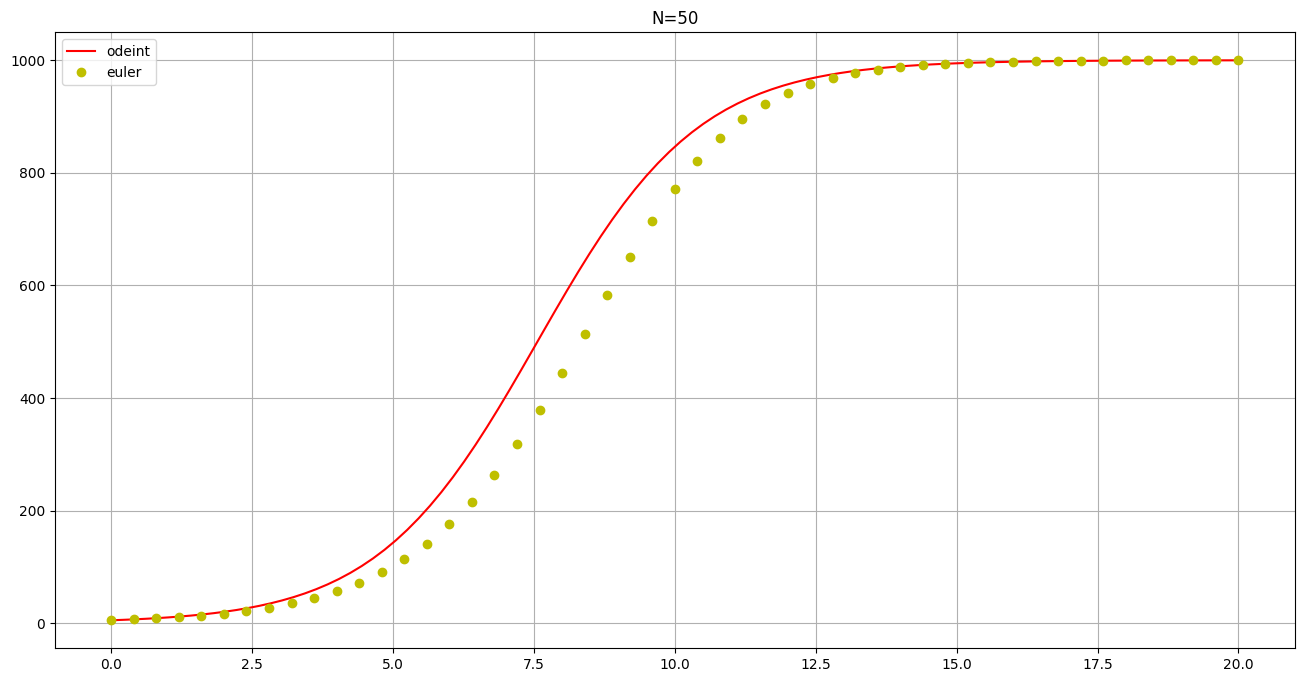

In [45]:
n=50
te,ze=Euler(croissanceCell,y0,t0,T,n)

plt.figure(figsize=(16, 8))
plt.grid()
plt.title("N="+str(n))
plt.plot(t, y, 'r-', label="odeint")
plt.plot(te, ze, 'yo', label="euler")
plt.legend()
plt.show()

Testez plusieurs valeurs de $N$, par exemple $N=10,\ 50,\ 100, 200$ pour observer visuellement l'évolution de l'erreur en fonction de $N$ et vérifier la convergence de la méthode.

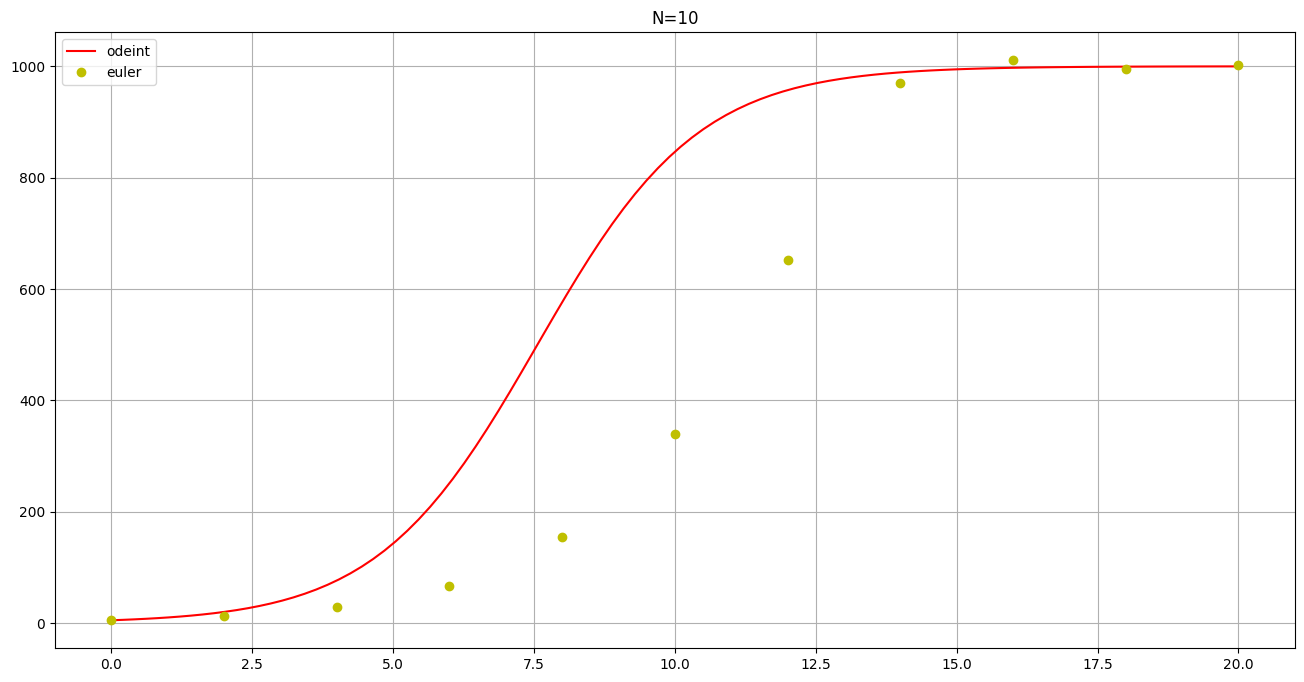

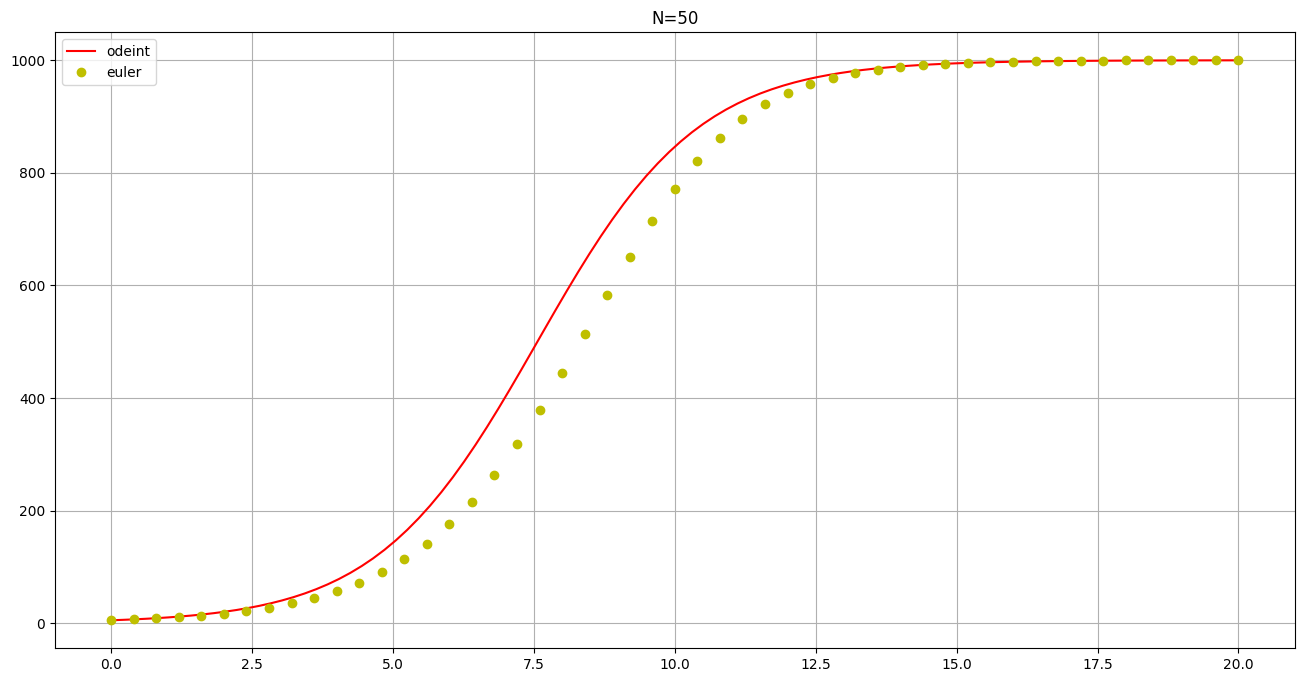

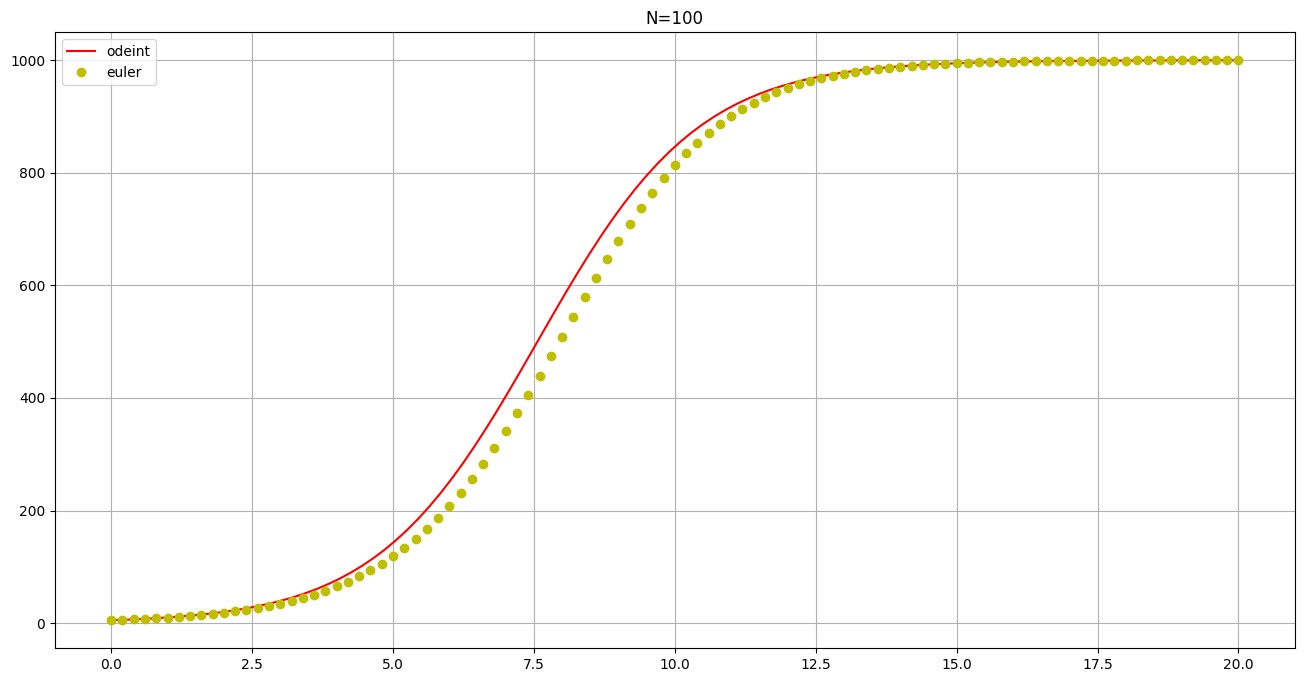

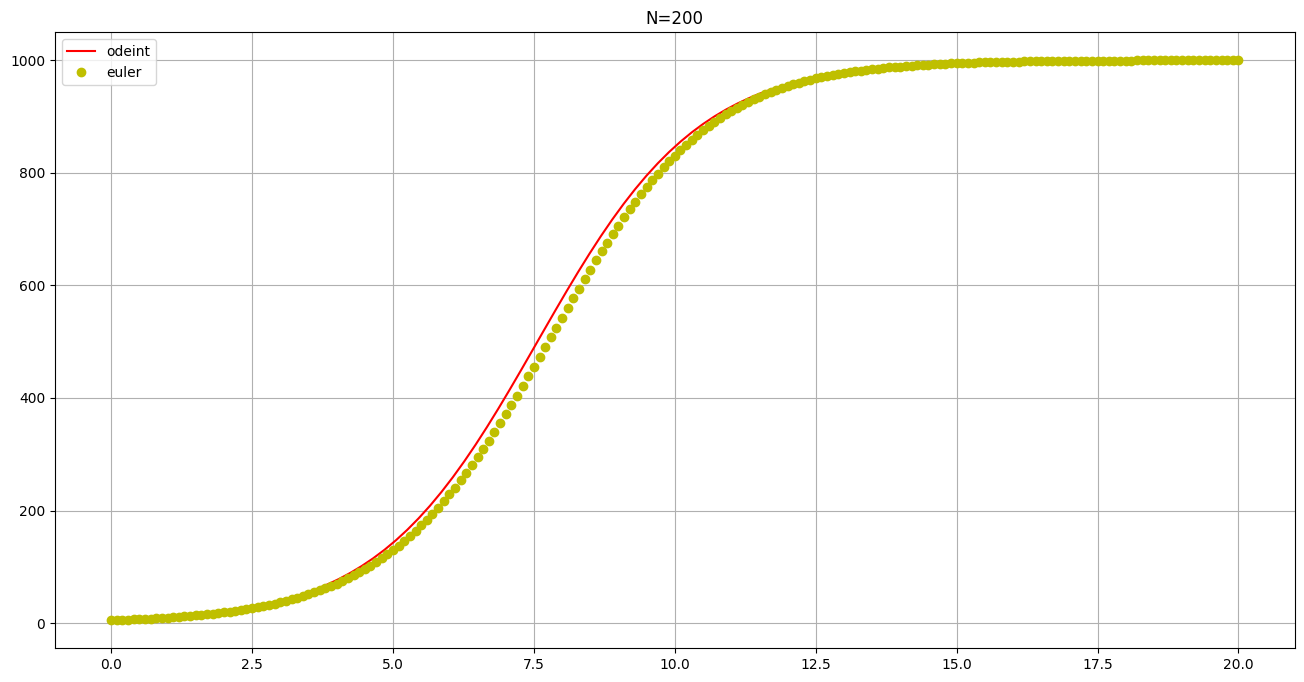

In [46]:
for n in [10,50,100,200]:
    te,ze=Euler(croissanceCell,y0,t0,T,n)

    plt.figure(figsize=(16, 8))
    plt.grid()
    plt.title("N="+str(n))
    plt.plot(t, y, 'r-', label="odeint")
    plt.plot(te, ze, 'yo', label="euler")
    plt.legend()
    plt.show()

#### Mesure empirique de l'ordre du schéma d'Euler explicite

Par l'expérimentation, il est possible de déterminer empiriquement l'ordre d'un schéma numérique. On considère ici $t_0=0$,
$$
T=10,
$$

$h=h(N)=\frac{T-t_0}{N}$, $t_n = t_0 + hn$. On note

$$
e_N = |\rho(t_N) - z_N| = |\rho(T) - z_N|.
$$

Si le schéma est d'ordre $p$, alors on aura

$$
e_N \approx C\, h^p
$$

pour une certaine constante $C>0$. En passant à l'échelle logarithmique,
on a

$$
\log(e_N) \approx K + p \, \log(h(N))
$$

où $K=\log(C)$. Pour les valeurs successives $N=64,\, 128,\, 256,\, 512, \,1024,\,2048$, affichez les valeurs $z_N$, $e_N$. Fabriquez deux tableaux
$\log(h(N)$ et $\log(e_N)$ et tracez le graphe correspondant dans le plan
$(\log(h),\,\log(e))$. 

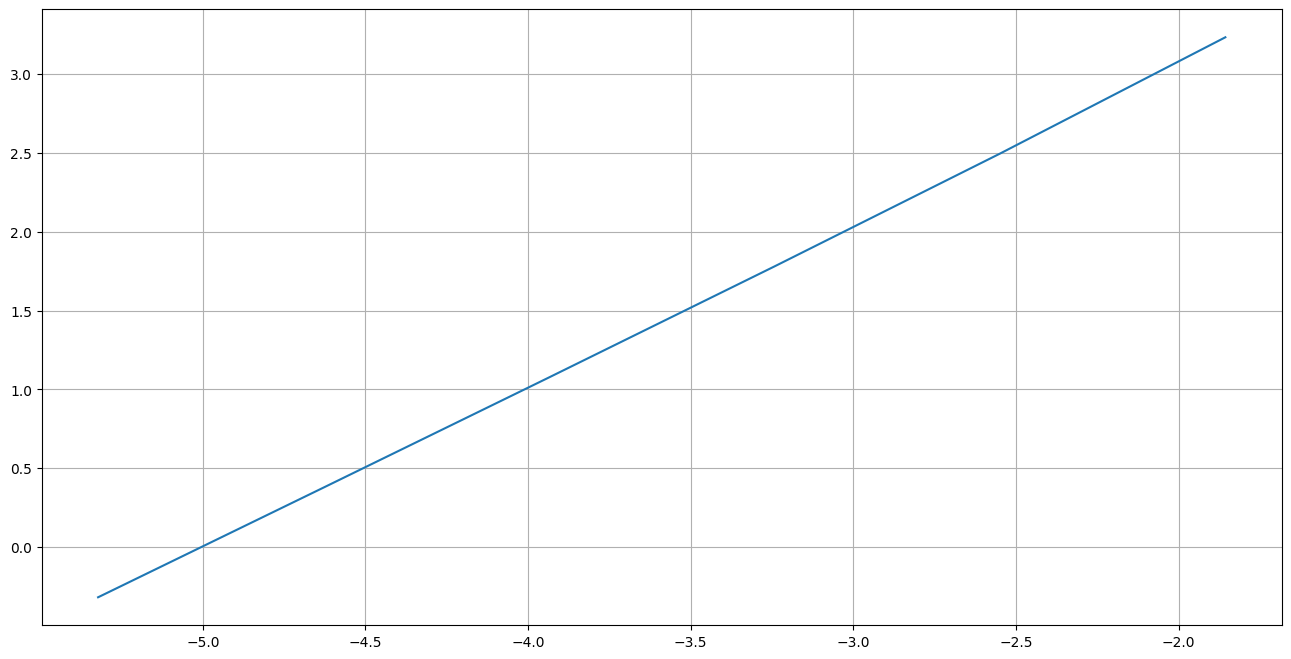

In [47]:
hn=np.zeros(6)
en=np.zeros(6)
N=[64,128,256,512,1024,2048]
T=10
n=0

for i in N:
    h=(T-t0)/i
    _,ze=Euler(croissanceCell,y0,t0,T,i)
    hn[n]=h
    en[n]=abs(rho(T)-ze[i])
    n+=1

plt.figure(figsize=(16, 8))
plt.grid()
plt.plot(np.log(hn), np.log(en), '-')
plt.show()


En déduire une valeur empirique de $h$ par moindres carrés.

In [48]:
# p=1

#### Schéma de Runge-Kutta RK2

Le schéma de Runge-Kutta RK2 (ou schéma d'Euler-Cauchy) du cours s'écrit

\begin{align*}
& k_1 = F(t_n, z_n), \\[1.3ex]
& k_2 = F(t_n+h, z_n+h\,k_1) \\
& z_{n+1} = z_n + \frac{h}{2}\left( k_1+k_2\right).
\end{align*}

Mettre en oeuvre ce schéma dans une méthode ```RK2(F, y0, t0, T, N)```.

In [49]:
def RK2(croissanceCell, y0, t0, T, N):
    # ...
    h=(T-t0)/N
    t=np.linspace(t0,T,N+1)
    z=np.zeros(N+1)
    z[0]=y0

    for i in range(N):
        k1=croissanceCell(t[i],z[i])
        k2=croissanceCell(t[i]+h,z[i]+h*k1)
        z[i+1]=z[i]+h/2*(k1+k2)

    return t, z

Appliquez le schéma RK2 au modèle de croissance cellulaire avec 
$T=20$ et $N=30$. Comparez au résultat obtenu par le schéma d'Euler explicite ainsi qu'à la solution de référence obtenue avec `odeint()`. Commentez.

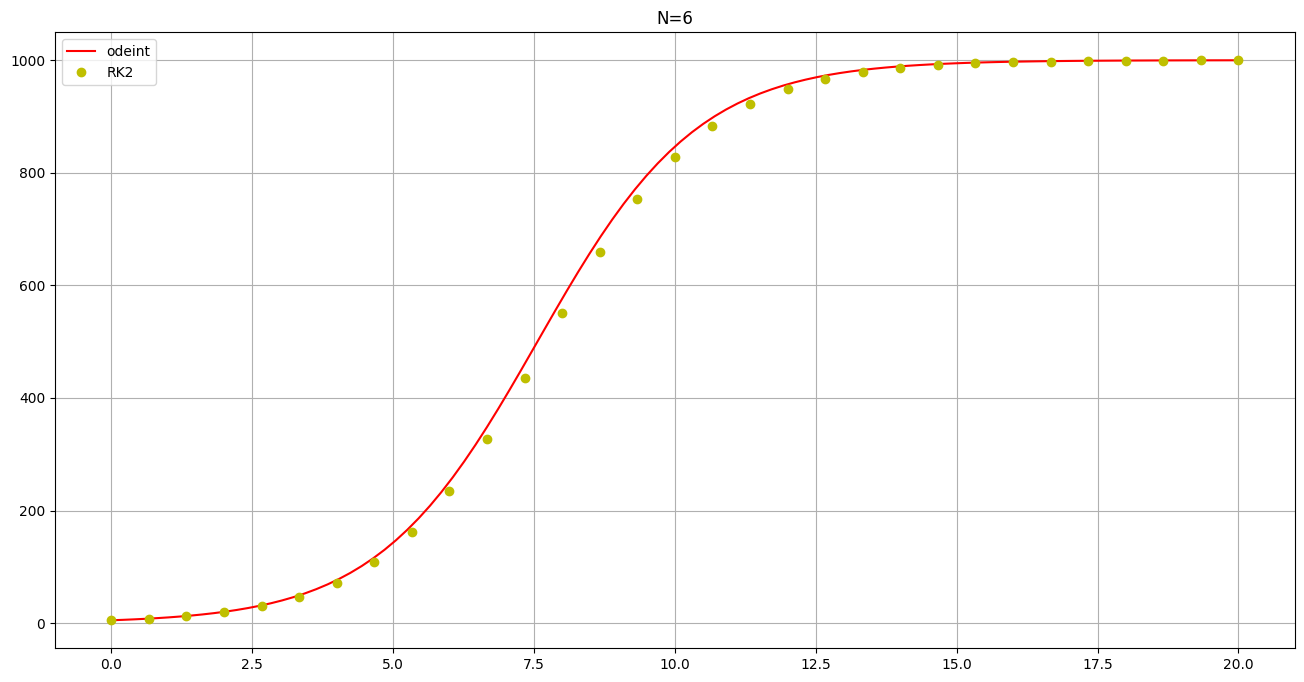

In [50]:
T=20
N=30

y=odeint(croissanceCell,rho0,t,tfirst=True)
t2,z2=RK2(croissanceCell,y0,t0,T,N)

plt.figure(figsize=(16, 8))
plt.grid()
plt.title("N="+str(n))
plt.plot(t, y, 'r-', label="odeint")
plt.plot(t2, z2, 'yo', label="RK2")
plt.legend()
plt.show()

Estimez empiriquement l'ordre du schéma RK2 en répétant la méthodologie décrite plus haut.

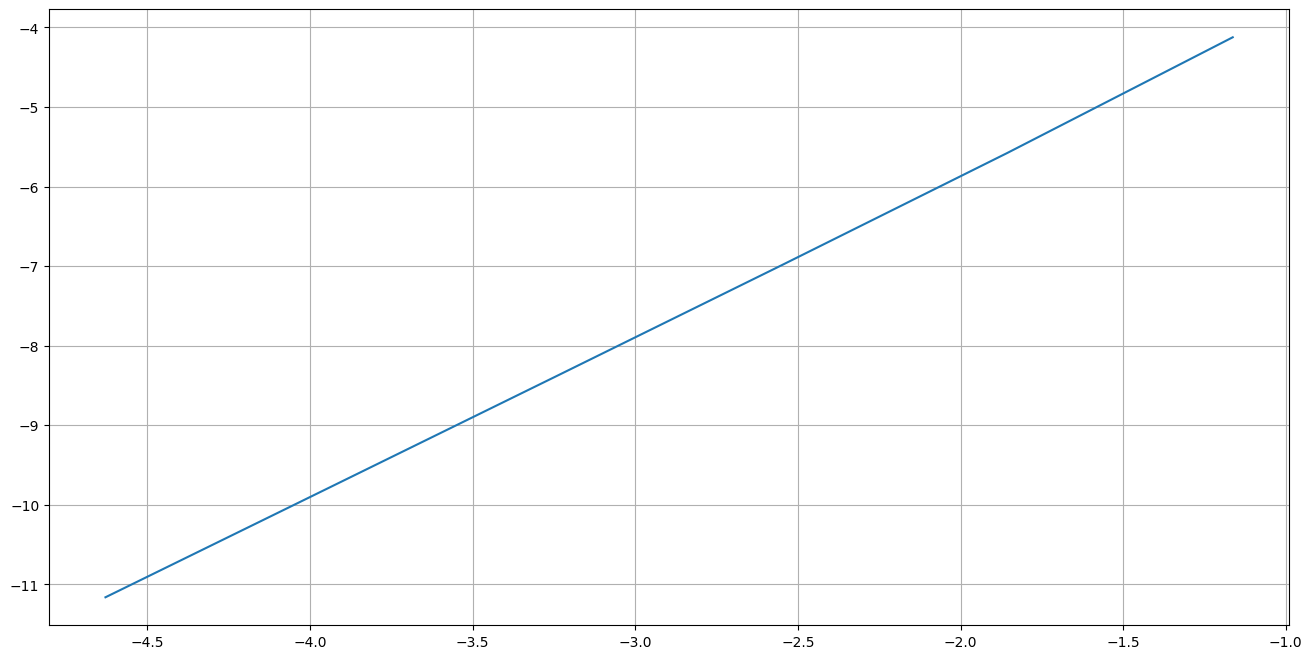

In [51]:
hn=np.zeros(6)
en=np.zeros(6)
N=[64,128,256,512,1024,2048]
T=20
n=0

for i in N:
    h=(T-t0)/i
    _,z2=RK2(croissanceCell,y0,t0,T,i)
    hn[n]=h
    en[n]=abs(rho(T)-z2[i])
    n+=1

plt.figure(figsize=(16, 8))
plt.grid()
plt.plot(np.log(hn), np.log(en), '-')
plt.show()

In [52]:
# p=2

### 2. Oscillateur non linéaire de Duffing

Le système non linéaire de Duffing modélise un système masse-ressort isolé avec une loi d'élasticité non linéaire cubique. Les équations de la cinématique et de la dynamique autour de l'équilibre donnent

\begin{align*}
& \dot x(t) = v(t), \\
& \dot v(t) = - \alpha\, x(t) -\beta\, x^3(t).
\end{align*}

Le terme $\alpha x$ est le terme d'élasticité linéaire classique avec $\alpha>0$ le coefficient de raideur du ressort. Le terme non linéaire
$\beta x^3$, $\beta>0$, agit pour les plus forts déplacements et exprime une plus grande force de rappel.

On peut vérifier que l'énergie totale du système (somme d el'énergie élastique et de l'énergie cinétique)

$$
E=E(x,v) = \alpha \frac{x^2}{2} + \beta \frac{x^4}{4}
+ \frac{v^2}{2}
$$

est conservée au cours du temps (système hamiltonien).

Ecrire d'abord le système sous la forme vectorielle générique

$$
\frac{d\mathbf{y}}{dt} = \mathbf{F}(t, \mathbf{y}(t))
$$

où l'on précisera $\mathbf{y}$ et $\mathbf{F}(t,\mathbf{y})$. Ecrire une fonction python ```Duffing(t,y)``` qui implémente $F$.
Pour les paramètres, on prendra $\alpha=1$ et $\beta=12$.

In [53]:
# function that returns ydot
def Duffing(t,y):
    # ...
    x,v=y
    dxdt=v
    dvdt=-1*alpha*x-beta*x**3
    ydot=[dxdt,dvdt]

    return ydot

Intégrer numériquement le problème différentiel en utilisant ```odeint()```. On prendra $t_0=0$, $T=4$, 
$y_0=(x_0,v_0)^T=(2,0)^T$ et ```t = np.linspace(0,T, 200)```.
Tracer les solutions numériques $t\mapsto x(t)$ et $t\mapsto v(t)$ obtenues. Tracer de même l'évolution de l'énergie totale $t\mapsto E(t)$ et faites attention à l'échelle de l'axe des ordonnées.

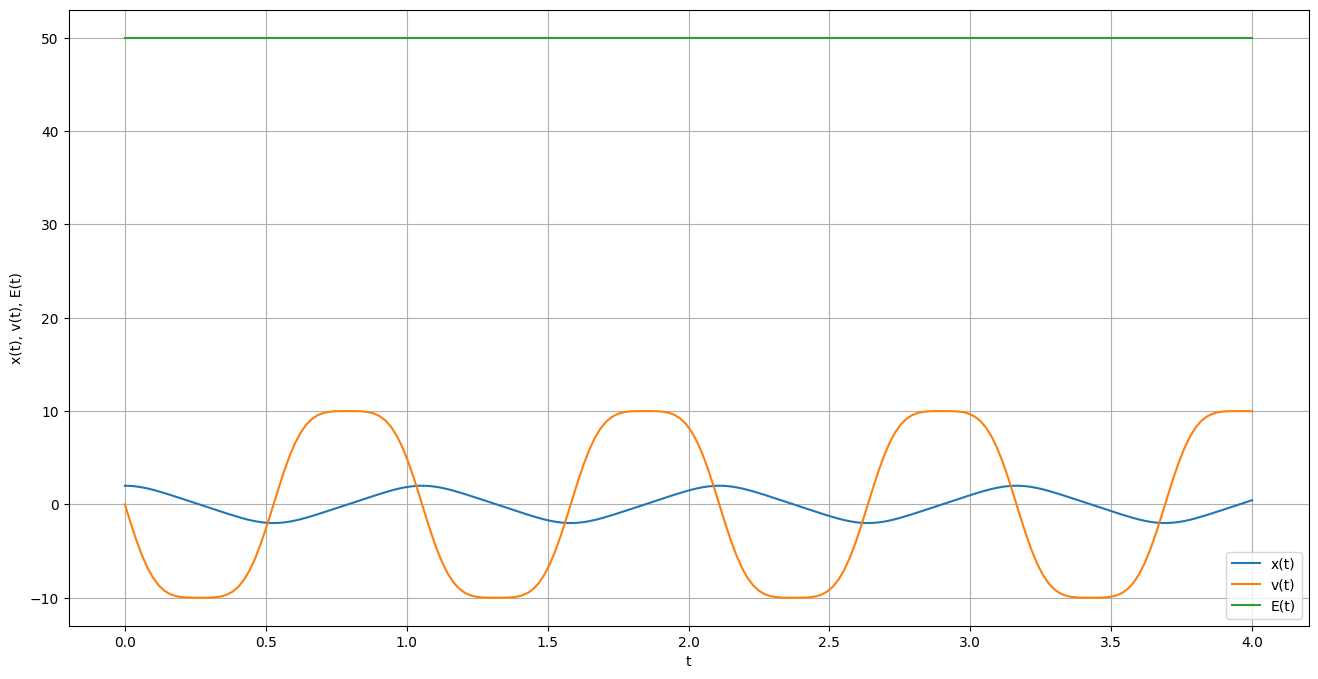

In [54]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

alpha=1
beta=12

def E(x,v):
    return alpha*x**2/2+beta*x**4/4+v**2/2


t0=0
T=4
y0=np.array([2,0])
t=np.linspace(0,T,200)

yd=odeint(Duffing, y0, t,tfirst=True)
xd=yd[:,0]
vd=yd[:,1]

et=E(xd, vd)

plt.figure(figsize=(16, 8))
plt.plot(t,xd,label='x(t)')
plt.plot(t,vd,label='v(t)')
plt.plot(t,et,label='E(t)')
plt.xlabel('t')
plt.ylabel('x(t), v(t), E(t)')
plt.grid()
plt.legend()
plt.show()


Tracer de même la solution $(x(t),v(t))_{t\in[0,T]}$ dans le plan de phase $(x,v)$. La courbe fermée ainsi obtenue est dite une orbite.

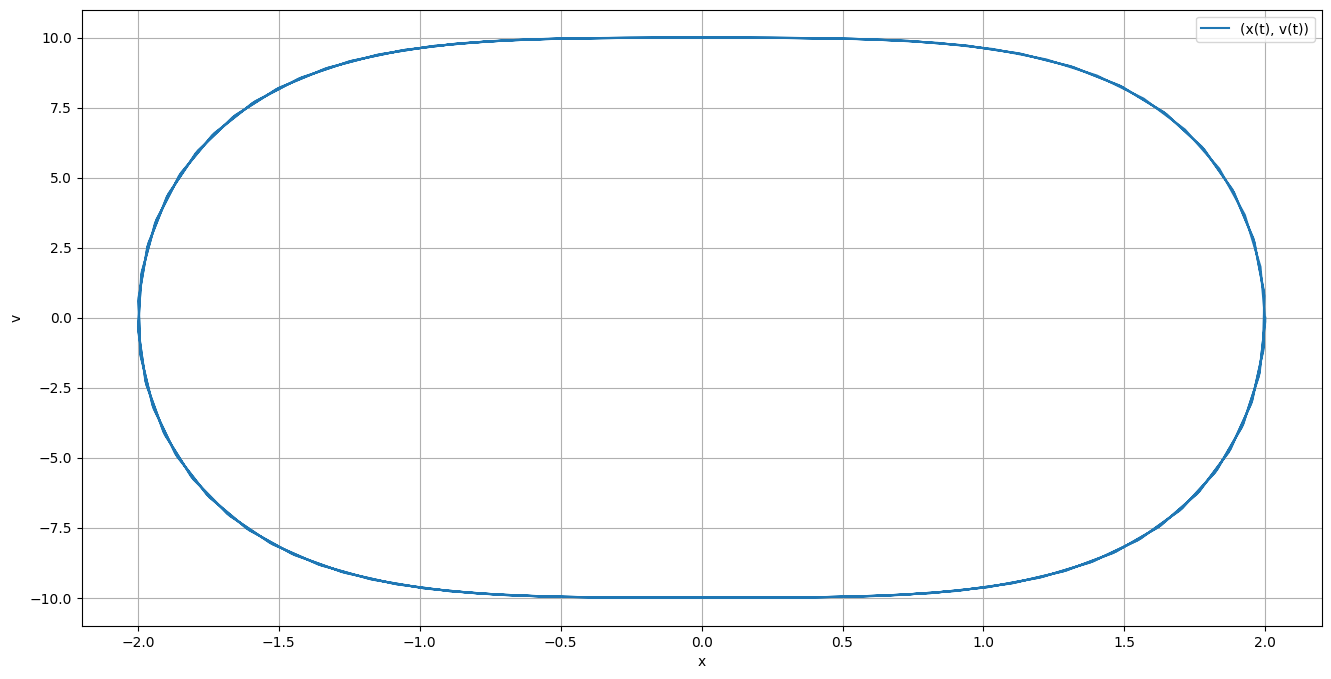

In [55]:
plt.figure(figsize=(16, 8))
plt.plot(xd, vd, label='(x(t), v(t))')
plt.xlabel('x')
plt.ylabel('v')
plt.grid()
plt.legend()
plt.show()

Appliquer le schéma d'Euler à l'oscillateur de Duffing avec $N=500$. Tracer les solutions numériques obtenues ainsi que l'évolution de l'énergie totale. Est-ce satisfaisant ? 

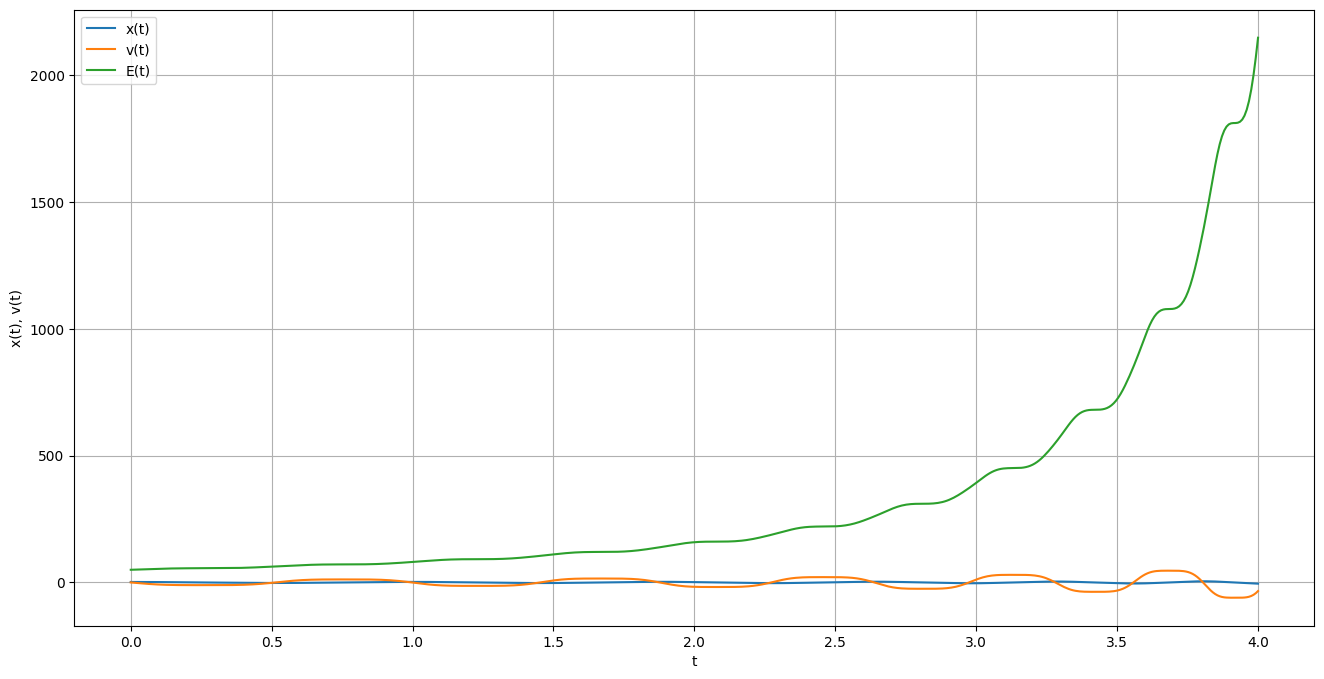

In [56]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def Euler(croissanceCell,y0,t0,T,N):
    y0=np.asarray(y0)
    h=(T-t0)/N

    t=np.zeros(N+1)
    z=np.zeros((y0.size, N+1))

    t[0]=t0
    z[:,0]=y0

    for i in range(N):
        k=np.array(croissanceCell(t[i], z[:,i]))
        z[:,i+1]=z[:,i]+h*k
        t[i+1]=t[i]+h

    return t,z

N=500
y0=np.array([2, 0])
t0=0
T=4

te2,ze2=Euler(Duffing,y0,t0,T,N)
et2=E(ze2[0], ze2[1])


plt.figure(figsize=(16, 8))
plt.plot(te2, ze2[0], label='x(t)')
plt.plot(te2, ze2[1], label='v(t)')
plt.plot(te2, et2, label='E(t)')
plt.xlabel('t')
plt.ylabel('x(t), v(t)')
plt.grid()
plt.legend()


In [57]:
# pas satisfaisant

Appliquez le schéma RK2 au système de Duffing où l'on comparerea les solutions avec celles obtenues avec ```odeint()``` ainsi que l'évolution de l'énergie totale $E$. Commentez. 

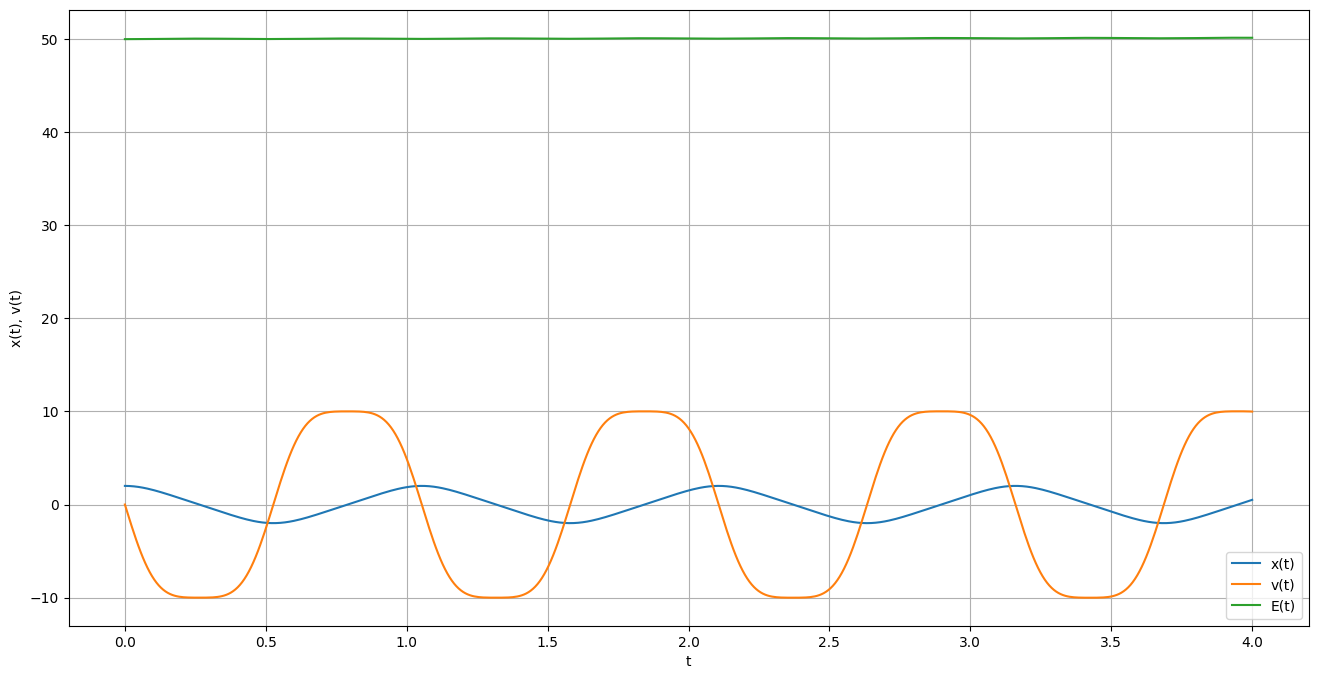

In [58]:
def RK2(croissanceCell, y0, t0, T, N):
    y0=np.asarray(y0)
    h=(T-t0)/N
    t=np.zeros(N+1)
    z=np.zeros((y0.size,N+1))

    t[0] = t0
    z[:,0] = y0

    for i in range(N):
        k1 = np.array(croissanceCell(t[i],z[:,i]))
        k2 = np.array(croissanceCell(t[i]+h,z[:,i]+h*k1))
        z[:,i+1]=z[:,i]+h/2*(k1+k2)
        t[i+1]=t[i]+h

    return t, z

N=500
y0=np.array([2, 0])
t0=0
T=4

trk, zrk = RK2(Duffing,y0,t0,T,N)
et3 = E(zrk[0], zrk[1])

plt.figure(figsize=(16, 8))
plt.plot(trk, zrk[0], label='x(t)')
plt.plot(trk, zrk[1], label='v(t)')
plt.plot(trk, et3, label='E(t)')
plt.xlabel('t')
plt.ylabel('x(t), v(t)')
plt.grid()
plt.legend()

#### Schéma à variables décalées de Verlet

\begin{align*}
	& x_{n+1} = x_n + h v_{n+1/2}, \\
	& v_{n+3/2} = v_{n+1/2} - h\alpha\, x_{n+1} - h \beta\, x_{n+1}^3.  
\end{align*}

Les données initiales sont toujours $x_0=2$ et $v_0=0$. Pour "l'initialisation" de $v_{1/2}$ on utilisera ici simplement le schéma d'Euler explicite sur $v$ (sachant que l'on peut faire mieux) :

$$
v_{1/2} = v_0 - \frac{h}{2}\alpha\, x_0 - \frac{h}{2}\beta\, x_0^3.
$$

Mettre en oeuvre le schéma de Verlet pour l'oscillateur de Duffing. On utilisera une subdivision uniforme comme pour le schéma d'Euler avec $h=\frac{T-t_0}{N}$. Tracer les solutions numériques $t\mapsto x(t)$ et $t\mapsto v(t)$ ainsi obtenues. On utilisera 
$N=100$.

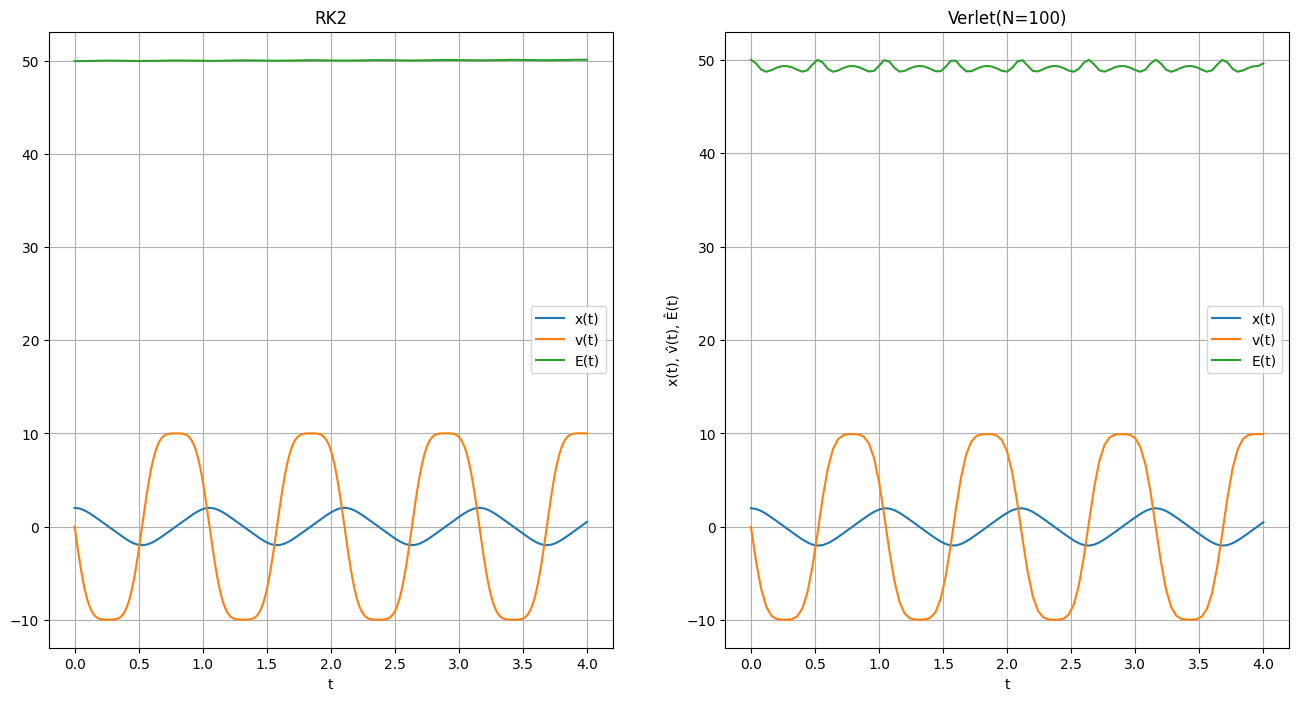

In [59]:
def Verlet_Duffing(x0, v0, t0, T, N):
    alpha=1
    beta=12
    h=(T-t0)/N
    t=np.linspace(t0,T,N+1)
    x=np.zeros(N+1)
    x[0]=x0

    v_half=np.zeros(N)
    v_half[0]=v0-(h/2)*(alpha*x0+beta*x0**3)

    for i in range(N):
        if i < N:
            x[i+1] = x[i] + h * v_half[i]
        if i < N - 1:
            v_half[i+1]=v_half[i]-h*(alpha*x[i+1]+beta*x[i+1]**3)

    v_hat=np.zeros(N+1)
    v_hat[0]=v0
    for m in range(1, N):
        v_hat[m]=(v_half[m-1]+v_half[m])/2
    v_hat[N]=v_half[N-1]

    E_hat=E(x, v_hat)

    return t, x, v_hat, E_hat


y0=np.array([2, 0])
t0=0
T=4

Nrk = 500
trk, zrk = RK2(Duffing, y0, t0, T, Nrk)
et3 = E(zrk[0],zrk[1])

Nv1=100
tv1, xv1, vv1, Ev1 = Verlet_Duffing(2, 0, t0, T, Nv1)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title("RK2")
plt.plot(trk, zrk[0], label='x(t)')
plt.plot(trk, zrk[1], label='v(t)')
plt.plot(trk, et3, label='E(t)')
plt.xlabel('t')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Verlet(N=100)')
plt.plot(tv1, xv1, label='x(t)')
plt.plot(tv1, vv1, label='v(t)')
plt.plot(tv1, Ev1, label='E(t)')
plt.xlabel('t')
plt.ylabel('x(t), v̂(t), Ê(t)')
plt.grid()
plt.legend()
plt.show()



Les variables discrètes de positions $x_n$ et de vitesse $v_{n+1/2}$ ne sont pas définies aux mêmes instants discrets, si bien que l'on ne peut pas définir strictement une énergie totale. On peut toutefois définir une estimation en calculant une valeur moyenne $\hat v_n$ de vitesse aux temps $t_n$ par

$$
\hat v_n = \frac{v_{n-1/2}+v_{n+1/2}}{2}
$$

et définir une énergie totale approchée $\hat E_n$ par

$$
\hat E_n = \alpha\frac{x_n^2}{2}+\beta \frac{x_n^4}{4} + \frac{\hat v_n^2}{2}.
$$

Tracer dans ce cas l'évolution de $\hat E_n$ ainsi définie au cours du temps. Est-ce satisfaisant ? 

Refaire le calcul et les graphiques avec $N=200$.

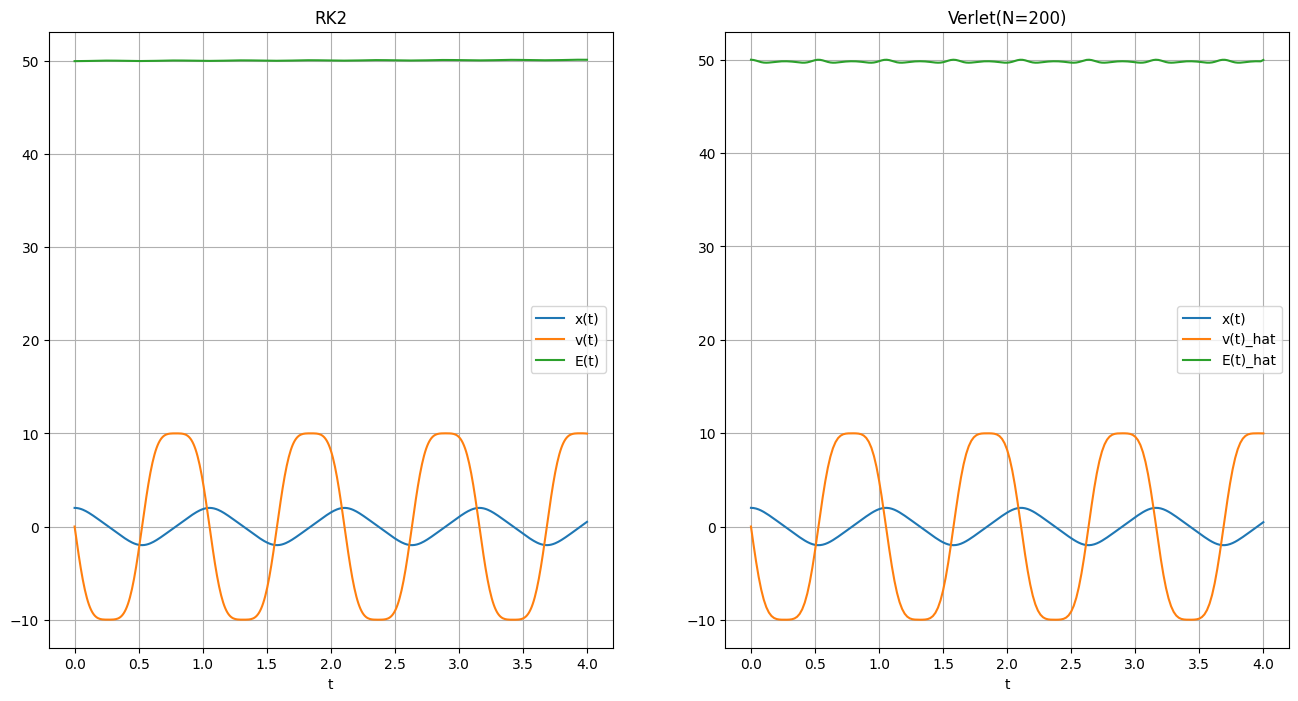

In [60]:
Nv2=200
tv2, xv2, vv2, Ev2 = Verlet_Duffing(2, 0, t0, T, Nv2)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.title("RK2")
plt.plot(trk, zrk[0], label='x(t)')
plt.plot(trk, zrk[1], label='v(t)')
plt.plot(trk, et3, label='E(t)')
plt.xlabel('t')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Verlet(N=200)')
plt.plot(tv2, xv2, label='x(t)')
plt.plot(tv2, vv2, label='v(t)_hat')
plt.plot(tv2, Ev2, label='E(t)_hat')
plt.xlabel('t')
plt.grid()
plt.legend()
plt.show()


C'est fini pour les TPs !